In [ ]:
import tensorflow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from multiprocessing import  Pool
import math
import itertools
plt.style.use('fivethirtyeight')
from subprocess import check_output
# import cudf

In [36]:
dtypes = {'CLUES':'category','EDAD': np.uint8,'CVEEDAD': 'category','SEXO': 'category','DERHAB': 'str', \
          'TIPOCAMA':'category', 'AFECPRIN':'category','ENVIADOA':'category','MES_ESTAD': np.uint8, \
          'FECHAINGRE': 'str','HORAINIATE': np.uint8,'MININIATE': np.uint8,'FECHAEGRE': 'str',\
          'HORATERATE': np.uint8, 'MINTERATE': np.uint8}
dates = ['FECHAINGRE', 'FECHAEGRE']

In [24]:
dat_2014 = pd.read_csv('./data/URGENCIAS_2014.csv',index_col=0,header=None,delimiter=';',encoding='latin1')

In [72]:
# URGENCIAS_2008 = pd.read_csv('./data/URGENCIAS_2008.csv',header=0,delimiter=',',encoding='latin1')
# URGENCIAS_2009 = pd.read_csv('./data/URGENCIAS_2009.csv',header=None,delimiter=';',encoding='latin1')
# URGENCIAS_2010 = pd.read_csv('./data/URGENCIAS_2010.csv',header=None, delimiter = ';', encoding='latin1')
# URGENCIAS_2011 = pd.read_csv('./data/URGENCIAS_2011.csv',header=None,delimiter=';', encoding='latin1')
# URGENCIAS_2012 = pd.read_csv('./data/URGENCIAS_2012.csv',header=None,delimiter=';', encoding='latin1')
# URGENCIAS_2013 = pd.read_csv('./data/URGENCIAS_2013.csv',header=None,delimiter=';', encoding='latin1')
# URGENCIAS_2014 = pd.read_csv('./data/URGENCIAS_2014.csv',header=None,delimiter=';', encoding='latin1')
# URGENCIAS_2015 = pd.read_csv('./data/URGENCIAS_2015.csv',header=0,delimiter=',', encoding='latin1')
# URGENCIAS_2016 = pd.read_csv('./data/URGENCIAS_2016.csv',header=0, delimiter=',',encoding='latin1')
# URGENCIAS_2017 = pd.read_csv('./data/URGENCIAS_2017.csv',header=0,delimiter='|', encoding='latin1')
# display(URGENCIAS_2008.head())
# display(URGENCIAS_2009.head())
# display(URGENCIAS_2010.head())
# display(URGENCIAS_2011.head())
# display(URGENCIAS_2012.head())
# display(URGENCIAS_2013.head())
# display(URGENCIAS_2014.head())
# display(URGENCIAS_2015.head())
# display(URGENCIAS_2016.head())
# display(URGENCIAS_2017.head())
del(URGENCIAS_2008)
del(URGENCIAS_2009)
del(URGENCIAS_2010)
del(URGENCIAS_2011)
del(URGENCIAS_2012)
del(URGENCIAS_2013)
del(URGENCIAS_2014)
del(URGENCIAS_2015)
del(URGENCIAS_2016)
del(URGENCIAS_2017)

| Year | Before     |After     |
| ---- | --------- | -------- |
| 2008 | 1.01 Gb	|  0.20 Gb |
| 2009 | 1.29 Gb	|  0.27 Gb |
| 2010 | 1.56 Gb	|  0.29 Gb |
| 2011 | 1.71 Gb	|  0.32 Gb |
| 2012 | 1.97 Gb	|  0.35 Gb |
| 2013 | 2.08 Gb	|  0.37 Gb |
| 2014 | 2.21 Gb	|  0.40 Gb |
| 2015 | 2.27 Gb	|  0.41 Gb |
| 2016 | 2.11 Gb	|  0.38 Gb |
| 2017 | 2.70 Gb	|  0.33 Gb |


  Column Name | Description | Type |
 ------------ | :---------: | ---- |
 ID	| Identifier | Int
 CLUES	| Hospital unique code | String
 EDAD	| Age | Short Int
 CVEEDAD	| Age unit | Short Int
 SEXO	| Gender | Short Int
 DERHAB	| Insurance coverage | Short Int
 TIPOCAMA	| Type of bed assigned to patient (Triage) | Short Int
 AFECPRIN	| Code of cause of visit | String
 ENVIADOA	| Id of patient next step | Short Int
 MES_ESTAD	| Statistical month of registry | Short Int
 FECHAINGRE	| Date of patient admision (yyyy-mm-dd) | DateTime
 HORAINIATE	| Hour of patient admision (hh) | Time
 MININIATE     | Minute of patient admision (mm) | Time
 FECHAEGRE	    | Date of patient discharge (dd/mm/yyyy) | DateTime
 HORATERATE	| Hour of patient discharge (hh) | Time
 MINTERATE	    | Minute of patient discharge (mm) | Time

In [37]:
#Load data from 2008
# ----- 22 columns
# dat_2008 = pd.read_csv('./data/URGENCIAS_2008.csv',header=0,delimiter=',',encoding='latin1')
# dat_2008.drop( columns=['ID', 'FOLIO', 'MOTATE', 'CAUSAEXT', 'TRAUMAT','LUGAR', 'HORASESTA'],axis=1, inplace=True)
# cols = ['CLUES','EDAD','CVEEDAD','SEXO','DERHAB','TIPOCAMA','AFECPRIN','ENVIADOA','MES_ESTAD','FECHAINGRE','HORAINIATE','MININIATE','FECHAEGRE','HORATERATE','MINTERATE']
# dat_2008 = dat_2008[cols]
# nombrada
# =---- ya 15 columnas 
dat_2008 = pd.read_csv('./data/clean/2008.csv', header=0, dtype = dtypes,parse_dates=dates)
# Pasar horas entrada y salida de 24 a 0 hrs (siguiente dia) 
dat_2008.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,ASSSA000025,28,3,2,0,1,M436,4,8,2008-08-06,20,30,2008-08-07,0,30
1,ASSSA000025,10,3,1,0,3,A029,1,8,2008-08-08,22,15,2008-08-09,1,30
2,ASSSA000025,24,3,2,0,3,A09X,4,8,2008-08-13,22,0,2008-08-13,22,30
3,ASSSA000025,17,3,1,0,3,S069,4,8,2008-08-15,23,40,2008-08-16,1,0
4,ASSSA000025,19,3,2,0,1,K819,1,8,2008-08-18,22,45,2008-08-19,4,0


In [38]:
#Load data from 2009
# ----- 22 columns
# dat_2009 = pd.read_csv('./data/URGENCIAS_2009.csv',header=None,delimiter=';',encoding='latin1')
# dat_2009.columns = new_cols
# dat_2009.drop( columns=['ID', 'FOLIO', 'MOTATE', 'TRAUMAT','LUGAR', 'HORASESTA'],axis=1, inplace=True)
# cols = ['CLUES','EDAD','CVEEDAD','SEXO','DERHAB','TIPOCAMA','AFECPRIN','ENVIADOA','MES_ESTAD','FECHAINGRE','HORAINIATE','MININIATE','FECHAEGRE','HORATERATE','MINTERATE']
# dat_2009 = dat_2009[cols]
#------ 15 columnas 
dat_2009 = pd.read_csv('./data/clean/2009.csv', header=0, dtype = dtypes,parse_dates=dates)
# Pasar horas entrada y salida de 24 a 0 hrs (siguiente dia) 
dat_2009.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,CCSSA000100,57,3,2,0,3,M792,4,12,2009-12-09,15,45,2009-12-09,16,10
1,CCSSA000100,7,2,2,0,3,J068,4,12,2009-11-30,12,45,2009-11-30,13,0
2,CCSSA000100,62,3,2,0,3,N390,4,12,2009-12-22,8,25,2009-12-22,8,35
3,CCSSA000100,22,3,1,0,3,S300,4,12,2009-12-22,10,20,2009-12-22,10,35
4,CCSSA000100,37,3,2,0,1,N390,1,12,2009-12-24,13,35,2009-12-24,23,40


In [39]:
#Load data from 2010
# ----- 25 columns
# dat_2010 = pd.read_csv('./data/URGENCIAS_2010.csv',header=None, delimiter = ';', encoding='latin1')
# ----- 15 columns
dat_2010 = pd.read_csv('./data/clean/2010.csv', header=0, dtype = dtypes,parse_dates=dates)
# Pasar horas entrada y salida de 24 a 0 hrs (siguiente dia) 
dat_2010.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,ASSSA000404,20,3,1,8,1,I10X,4,1,2010-01-25,21,5,2010-01-25,23,0
1,ASSSA000404,10,3,1,8,3,J209,4,3,2010-03-12,15,45,2010-03-12,16,0
2,ASSSA000404,10,3,2,8,3,K720,4,3,2010-03-12,16,0,2010-03-12,16,20
3,ASSSA000404,78,3,2,8,1,E140,4,3,2010-03-12,14,0,2010-03-12,18,0
4,ASSSA000404,28,3,2,8,1,I10X,4,3,2010-03-12,20,0,2010-03-12,20,30


In [40]:
#Load data from 2011
# ----- 25 columns
# dat_2011 = pd.read_csv('./data/URGENCIAS_2011.csv',header=None,delimiter=';', encoding='latin1')
# ----- 15 columns
dat_2011 = pd.read_csv('./data/clean/2011.csv', header=0, dtype = dtypes,parse_dates=dates)
# Pasar horas entrada y salida de 24 a 0 del siguiente dia
dat_2011.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,SLSSA000811,2,3,2,8,3,J029,4,4,2011-04-12,21,20,2011-04-12,21,40
1,SLSSA000811,12,3,2,8,3,T141,4,4,2011-04-12,21,40,2011-04-12,22,0
2,SLSSA000811,24,3,1,0,3,M624,4,4,2011-04-12,21,50,2011-04-12,22,0
3,SLSSA000811,1,3,2,0,3,K297,4,4,2011-04-12,22,0,2011-04-12,22,20
4,SLSSA000811,31,3,2,0,1,O429,1,4,2011-04-12,22,10,2011-04-12,22,20


In [41]:
#Load data from 2012
# ----- 26 columns
# dat_2012 = pd.read_csv('./data/URGENCIAS_2012.csv',header=None,delimiter=';', encoding='latin1')
# ----- 15 columns
dat_2012 = pd.read_csv('./data/clean/2012.csv', header=0, dtype = dtypes,parse_dates=dates)
# Checar que datos sean consistentes
dat_2012.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,VZSSA007573,13,3,2,8,3,N309,4,10,2012-10-25,15,35,2012-10-25,15,55
1,VZSSA007573,57,3,2,8,3,J459,4,10,2012-10-25,15,55,2012-10-25,16,5
2,VZSSA007573,47,3,1,0,3,N309,4,10,2012-10-25,16,55,2012-10-25,17,15
3,VZSSA007573,18,3,2,8,3,J068,4,10,2012-10-25,17,35,2012-10-25,17,45
4,VZSSA007573,11,3,2,8,3,A029,4,10,2012-10-25,17,45,2012-10-25,18,5


In [42]:
#Load data from 2013
# ----- 26 columns
# dat_2013 = pd.read_csv('./data/URGENCIAS_2013.csv',header=None,delimiter=';', encoding='latin1')
# ----- 15 columns
dat_2013 = pd.read_csv('./data/clean/2013.csv', header=0, dtype = dtypes,parse_dates=dates)
# checar consistencia
dat_2013.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,GTSSA000585,38,3,2,8,9,K291,4,9,2013-08-31,11,20,2013-08-31,11,40
1,GTSSA000585,6,3,1,0,1,T632,4,10,2013-10-02,16,30,2013-10-02,18,30
2,GTSSA000585,18,3,2,0,3,Z349,4,12,2013-12-02,21,30,2013-12-02,21,50
3,GTSSA000585,30,3,1,8,1,T632,4,2,2013-02-04,9,45,2013-02-04,13,30
4,GTSSA000585,22,3,1,8,9,M545,4,2,2013-02-04,10,5,2013-02-04,10,20


In [43]:
#Load data from 2014
# ----- 26 columns
# dat_2014 = pd.read_csv('./data/URGENCIAS_2014.csv',header=None,delimiter=';', encoding='latin1')
# ----- 15 columns
dat_2014 = pd.read_csv('./data/clean/2014.csv', header=0, dtype = dtypes,parse_dates=dates)
# ya consistentes -------------------
dat_2014.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,ZSSSA012853,19,3,2,8,9,O234,4,1,2014-01-16,15,18,2014-01-16,15,33
1,ZSSSA012853,35,3,2,8,9,O996,4,1,2014-01-16,15,34,2014-01-16,15,49
2,ZSSSA012853,10,3,1,8,9,S022,3,1,2014-01-16,15,49,2014-01-16,16,0
3,ZSSSA012853,10,3,1,8,9,R104,4,1,2014-01-16,16,6,2014-01-16,16,21
4,ZSSSA012853,24,3,2,8,9,J039,9,1,2014-01-16,8,0,2014-01-16,8,16


In [44]:
#Load data from 2015
# ----- columns
# dat_2015 = pd.read_csv('./data/URGENCIAS_2015.csv',header=0,delimiter=',', encoding='latin1')
# ----- 15 columns
dat_2015 = pd.read_csv('./data/clean/2015.csv', header=0, dtype = dtypes,parse_dates=dates)
# ya consistentes ------
dat_2015.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,CCSSA017670,31,3,2,0,1,O809,1,11,2015-10-28,14,20,2015-10-28,15,0
1,CCSSA017670,85,3,2,0,3,E149,2,12,2015-12-13,12,50,2015-12-13,13,10
2,CCSSA017670,18,3,2,0,3,L509,4,1,2015-01-04,9,15,2015-01-04,9,30
3,CCSSA017670,42,3,2,0,3,L039,4,2,2015-02-03,21,0,2015-02-03,21,20
4,CCSSA017670,19,3,1,0,1,S420,1,3,2015-03-02,12,30,2015-03-02,12,50


In [45]:
#Load data from 2016
# dat_2016 = pd.read_csv('./data/URGENCIAS_2016.csv',header=0, delimiter=',',encoding='latin1')
# ----- 15 columns
dat_2016 = pd.read_csv('./data/clean/2016.csv', header=0, dtype = dtypes,parse_dates=dates)
# limpiar fechas
dat_2016.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,ASSSA000025,25,3,2,0,2,G442,2,1,2015-12-26,6,9,2015-12-26,7,4
1,ASSSA000025,4,3,1,0,3,J46X,4,1,2015-12-26,1,17,2015-12-26,2,8
2,ASSSA000025,1,2,2,1,1,A379,1,1,2015-12-26,4,43,2015-12-26,5,43
3,ASSSA000025,3,1,1,8,2,S729,1,1,2015-12-26,9,28,2015-12-26,10,20
4,ASSSA000025,11,2,1,8,3,L989,4,1,2015-12-26,10,21,2015-12-26,11,58


In [46]:
#Load data from 2017 
# dat_2017 = pd.read_csv('./data/URGENCIAS_2017.csv',header=0,delimiter='|', encoding='latin1')
# ----- columsn 15
dat_2017 = pd.read_csv('./data/clean/2017.csv', header=0, dtype = dtypes,parse_dates=dates)
dat_2017.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,DFSSA017886,20,3,2,0,3,O471,4,11,2017-11-12,2,30,2017-11-12,2,50
1,DFSSA017886,22,3,1,0,3,Z049,4,4,2017-04-30,10,0,2017-04-30,10,15
2,DFSSA017886,33,3,2,0,3,O623,1,11,2017-11-12,3,0,2017-11-12,3,20
3,DFSSA017886,24,3,1,0,3,A099,4,4,2017-04-30,10,30,2017-04-30,10,45
4,DFSSA017886,39,3,2,0,3,O471,4,11,2017-11-12,3,30,2017-11-12,3,50


In [5]:
# Loda time series filtered data
# ----- columns 7
time_series = pd.read_csv('./data/clean/time_series.csv', header=0, dtype = dtypes,parse_dates=dates)
time_series.head()

,CLUES,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,ASSSA000025,2008-08-06,20,30,2008-08-07,0,30
1,ASSSA000025,2008-08-08,22,15,2008-08-09,1,30
2,ASSSA000025,2008-08-13,22,0,2008-08-13,22,30
3,ASSSA000025,2008-08-15,23,40,2008-08-16,1,0
4,ASSSA000025,2008-08-18,22,45,2008-08-19,4,0


In [14]:
# Load selected hospitals data
# ---- columns 7
ts_hospitals = pd.read_csv('./data/clean/ts_hospitals.csv', header = 0, dtype = dtypes, parse_dates= dates)

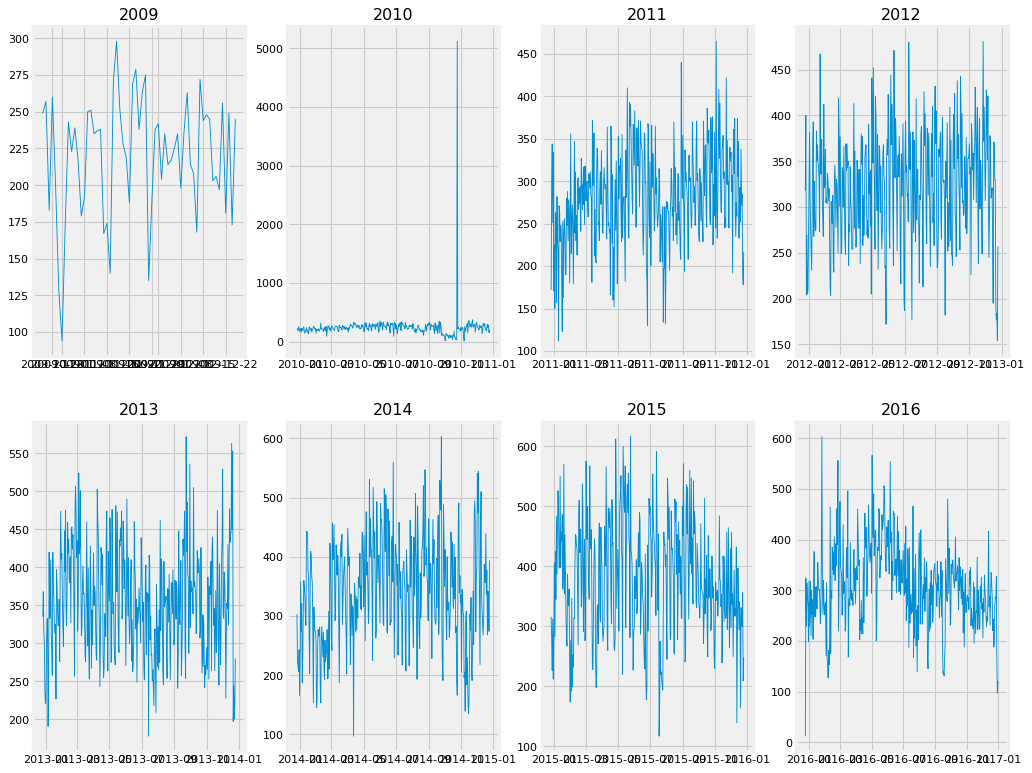

In [17]:
# ['CLUES', 'FECHAINGRE', 'EDAD', 'CVEEDAD', 'SEXO', 'DERHAB', 'TIPOCAMA',
#        'AFECPRIN', 'ENVIADOA', 'FECHAEGRE', 'MES_ESTAD', 'HORAINIATE',
#        'MININIATE', 'HORATERATE', 'MINTERATE']

# indexNames = dat_2009[ dat_2009['FECHAEGRE'] < '2009-01-01 00:00:00' ].index
# dat_2009.drop(indexNames , inplace=True)
# dat_2009[(dat_2009['HORATERATE'] == 24 )& (dat_2009['MINTERATE'] > 0)]
# dat_2010.CLUES.value_counts().head(5)
hospital = 'GTSSA002101'
plt.figure(figsize=(14,12), dpi= 80, facecolor='w')

plt.subplot(2,4,1)
plt.title('2009')
plt.plot(dat_2009[dat_2009.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)

plt.subplot(2,4,2)
plt.title('2010')
plt.plot(dat_2010[dat_2010.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)

plt.subplot(2,4,3)
plt.title('2011')
plt.plot(dat_2011[dat_2011.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)

plt.subplot(2,4,4)
plt.title('2012')
plt.plot(dat_2012[dat_2012.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)

#########################

plt.subplot(2,4,5)
plt.title('2013')
plt.plot(dat_2013[dat_2013.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)

plt.subplot(2,4,6)
plt.title('2014')
plt.plot(dat_2014[dat_2014.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)

plt.subplot(2,4,7)
plt.title('2015')
plt.plot(dat_2015[dat_2015.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)

plt.subplot(2,4,8)
plt.title('2016')
plt.plot(dat_2016[dat_2016.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)

plt.show()

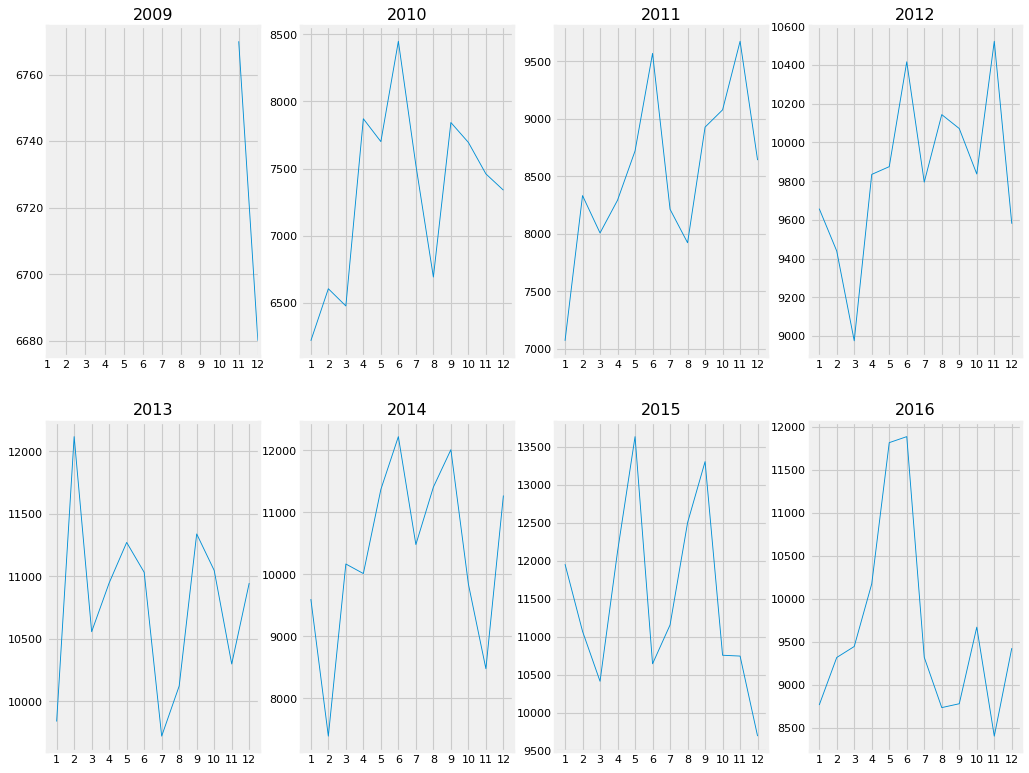

In [18]:
plt.figure(figsize=(14,12), dpi= 80, facecolor='w')
mes = [x for x in range(1,13)]

plt.subplot(2,4,1)
plt.title('2009')
plt.plot(dat_2009[dat_2009.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
plt.xticks(mes)

plt.subplot(2,4,2)
plt.title('2010')
plt.plot(dat_2010[dat_2010.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
plt.xticks(mes)

plt.subplot(2,4,3)
plt.title('2011')
plt.plot(dat_2011[dat_2011.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
plt.xticks(mes)

plt.subplot(2,4,4)
plt.title('2012')
plt.plot(dat_2012[dat_2012.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
plt.xticks(mes)

#########################

plt.subplot(2,4,5)
plt.title('2013')
plt.plot(dat_2013[dat_2013.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
plt.xticks(mes)

plt.subplot(2,4,6)
plt.title('2014')
plt.plot(dat_2014[dat_2014.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
plt.xticks(mes) 

plt.subplot(2,4,7)
plt.title('2015')
plt.plot(dat_2015[dat_2015.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
plt.xticks(mes)

plt.subplot(2,4,8)
plt.title('2016')
plt.plot(dat_2016[dat_2016.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
plt.xticks(mes)

plt.show()

In [19]:
### Returns normalized ints, single spaces and float('nan')
def ReturnValue(s):
    if s == '  ':
        return ' '
    else:
        try: 
            res = int(s)
            return res
        except ValueError:
            try: 
                res = float(s)
                if res == float('nan'):
                    return res
                res = int(res)
                return res
            except ValueError:
                return s
            
### paralellize a function using Pool and map
def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

###### Limpia DERHAB
def clean_DERHAB(year):
    for x in year.DERHAB.unique():
        if x == 'O ' or x == 'P ':
            year.loc[year.DERHAB == x, 'DERHAB'] = 'P'
        elif x == 'G ':
            year.loc[year.DERHAB == x, 'DERHAB'] = 'G'
        else:
            year.loc[year.DERHAB == x, 'DERHAB'] = ReturnValue(x)
            
#### Saves every dataset in the clean
def save_df(years):
    for y in years:
        eval("dat_" + y + ".to_csv('./data/clean/" + y + ".csv',index = False)" )
        display(y+"-> Done")
        
### Cambia fechaingreso por fechaegreso y organiza columnas
cols = ['CLUES','EDAD','CVEEDAD','SEXO','DERHAB','TIPOCAMA','AFECPRIN','ENVIADOA','MES_ESTAD','FECHAINGRE','HORAINIATE','MININIATE','FECHAEGRE','HORATERATE','MINTERATE']
def cambia_fechas(year):
    year.rename(columns={'FECHAEGRE':1,'FECHAINGRE':2},inplace = True)
    year.rename(columns={2:'FECHAEGRE',1:'FECHAINGRE'},inplace = True)
    return year[cols]

### changes Fechaingres and Fechaegreso to datetime in parallel
def time_to_series(dfs):
    for dat in dfs:
        dat.FECHAINGRE = parallelize_dataframe(dat['FECHAINGRE'], pd.to_datetime, 6)
        dat.FECHAEGRE = parallelize_dataframe(dat['FECHAEGRE'], pd.to_datetime, 6)
    
## deletes all rows with missing values from passed dataframes
def delete_null(dfs):
    for dat in dfs:
        indexes = dat[dat.isnull().any(axis=1)].index
        display(dat.head(1),len(indexes))
        dat.drop(indexes,inplace=True)

def clean_hours(dat):
    for y in ['HORAINIATE','HORATERATE','MININIATE','MINTERATE']:
        for x in dat[y].unique():
            dat.loc[dat[y] == x, y] = ReturnValue(x)
    pass
 
# years datasets
years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

### datasets
dat = [dat_2008,dat_2009,dat_2010,dat_2011,dat_2012,dat_2013,dat_2014,dat_2015,dat_2016,dat_2017]

In [20]:
# # Elimina fechas de ingreso de otros años
# # # Delete these row indexes from dataFrame
# indexNames = dat_2008[ dat_2008['HORAINIATE'] == ' ' ].index
# dat_2008.drop(indexNames , inplace=True)
# indexNames = dat_2008[ dat_2008['FECHAEGRE'] < '2008-01-01 00:00:00' ].index
# dat_2008.drop(indexNames , inplace=True)

# dat_2008.drop(['ID', 'FOLIO','LUGAR','MOTATE', 'CAUSAEXT', 'TRAUMAT', 'HORASESTA' ], axis=1, inplace=True)

# guardar datos modificados en csv limpio
#dat_2008.to_csv('./data/clean/2008.csv', sep=',', index=False )
# dat_2008[dat_2008.EDAD == 999]
# for i in [0,2,7,10,11,15,16,17,19]:
# print(dat_2010[11].value_counts())
# print(dat_2011[9].unique())

# for x in dat_2010.columns:
#     if x != 'DERHAB':
#         print(dat_2010[x].value_counts())
#         print(dat_2011[x].value_counts())

# ['CLUES', 'FECHAINGRE', 'EDAD', 'CVEEDAD', 'SEXO', 'DERHAB', 'TIPOCAMA',
# 'ENVIADOA', 'AFECPRIN', 'FECHAEGRE', 'MES_ESTAD', 'HORAINIATE',
# 'MININIATE', 'HORATERATE', 'MINTERATE']

# dat_2014.drop([0,2,7,8,10,11,14,16,17,18,20],axis=1,inplace=True)
# dat_2014.rename(columns={1:'CLUES',3:'FECHAINGRE',4:'EDAD',5:'CVEEDAD',6: 'SEXO',9:'DERHAB',12:'TIPOCAMA', 13:'ENVIADOA',15:'AFECPRIN',19:'FECHAEGRE',21:'MES_ESTAD',22:'HORAINIATE',23:'MININIATE',24:'HORATERATE',25:'MINTERATE'},inplace=True)
# CleanDERHAB(dat_2014)
# dat_2017.rename(columns={'MES_ESTADISTICO':'MES_ESTAD','FECHAALTA':'FECHAEGRE','FECHAINGRESO':'FECHAINGRE'}, inplace = True)
# cls = []
# for col in dat_2017.columns:
#     if col not in dat_2014.columns:
#         cls.append(col)
        
# dat_2017.drop(cls,axis=1,inplace=True)
#  CMBIAR FECHAINGRE POR FECHAEGRE 2014, 2013, 2012, 2011, 2010, 2009
dat_2017.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,DFSSA017886,20,3,2,0,3,O471,4,11,2017-11-12,2,30,2017-11-12,2,50
1,DFSSA017886,22,3,1,0,3,Z049,4,4,2017-04-30,10,0,2017-04-30,10,15
2,DFSSA017886,33,3,2,0,3,O623,1,11,2017-11-12,3,0,2017-11-12,3,20
3,DFSSA017886,24,3,1,0,3,A099,4,4,2017-04-30,10,30,2017-04-30,10,45
4,DFSSA017886,39,3,2,0,3,O471,4,11,2017-11-12,3,30,2017-11-12,3,50


In [41]:
series_cols = ['CLUES','FECHAINGRE','HORAINIATE','MININIATE','FECHAEGRE','HORATERATE','MINTERATE']
del(time_series)
time_series = dat_2008
display(dat_2008.shape)
for i in range(1,len(dat)):
    time_series = time_series.append(dat[i], ignore_index=True)
    display(dat[i].shape)
time_series.shape

(5596927, 15)

(7311111, 15)

(7816941, 15)

(8579202, 15)

(9509798, 15)

(10029423, 15)

(10634718, 15)

(10918517, 15)

(10159859, 15)

(8899738, 15)

(89456234, 15)

AttributeError: 'DataFrame' object has no attribute 'MES_ESTAD'

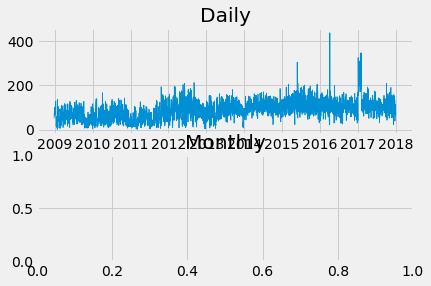

In [6]:
years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
hospital = 'DFSSA017886'
plt.subplot(2,1,1)
plt.title('Daily')
plt.plot(time_series[time_series.CLUES == hospital].FECHAINGRE.value_counts().sort_index(), linewidth=.8)


# s = time_series.FECHAINGRE.value_counts()

# plt.subplot(2,1,2)
# plt.title('Monthly')
# plt.plot(s.groupby(by=[s.index.year, s.index.month]).sum(), linewidth=.8)

#  Agregar ano a los meses 
plt.subplot(2,1,2)
plt.title('Monthly')
plt.plot(time_series[time_series.CLUES == hospital].MES_ESTAD.value_counts().sort_index(), linewidth=.8)
# plt.xticks(years)
plt.tight_layout()
plt.show()

In [31]:
# len(dat_master.FECHAINGRE.unique())
# display(time_series.FECHAINGRE.describe())
# time_series.to_csv('./data/clean/time_series.csv', sep=',', index=False)
s = time_series.FECHAINGRE.value_counts()
s
mth = s.groupby(by=[s.index.year, s.index.month]).sum()
display("Months")
display(mth.describe())
mth

'Months'

count       120.000000
mean     745468.616667
std      136020.611085
min      430985.000000
25%      661465.750000
50%      760211.000000
75%      852022.250000
max      958711.000000
Name: FECHAINGRE, dtype: float64

2008  1     449466
      2     430985
      3     484219
      4     478046
      5     488017
      6     477801
      7     498832
      8     493394
      9     496212
      10    495024
      11    454746
      12    449122
2009  1     541607
      2     526694
      3     612190
      4     638486
      5     657578
      6     613131
      7     623451
      8     611665
      9     668012
      10    688378
      11    598708
      12    548143
2010  1     610101
      2     574192
      3     686215
      4     662560
      5     708226
      6     664982
             ...  
2015  7     944918
      8     924961
      9     932331
      10    948952
      11    892576
      12    800590
2016  1     802483
      2     865280
      3     889088
      4     852158
      5     890184
      6     841020
      7     838567
      8     839247
      9     850017
      10    851977
      11    754005
      12    668606
2017  1     855785
      2     762568
      3     848981
      4     

In [ ]:

# dat_2017[dat_2017.FECHAINGRE != dat_2017.FECHAEGRE]
to_del = []
# to_del.append(time_series[time_series.FECHAINGRE.isna()].index)
# to_del.append(time_series[time_series.HORAINIATE.isna()].index)
# to_del.append(time_series[time_series.HORATERATE.isna()].index)
# to_del.append(time_series[time_series.MININIATE.isna()].index)
# to_del.append(time_series[time_series.HORAINIATE == 99].index)
# to_del.append(time_series[time_series.HORATERATE == 99].index)
# to_del.append(time_series[time_series.MES_ESTAD > 12].index)
for d in dat:
    to_del.append(d[d.FECHAINGRE < pd.datetime(2008,1,1)].index)

for ind in to_del:
    display(len(ind))


In [32]:
# dat_2016.drop(dat_2016[dat_2016.FECHAINGRE > '2017-01-31 00:00:00'].index, inplace=True)
# dat_2016[dat_2016.FECHAINGRE > '2017-01-31 00:00:00'].FECHAINGRE.value_counts()
# from pd.Series.dt import floor
# dat_2017['FECHAINGRE'] = parallelize_dataframe(dat_2017['FECHAINGRE'], pd.Series.dt.floor('d'), 6)
# i=0
# for year in dat:
#     yr = pd.to_datetime(years[i])
#     display(years[i], year[year['FECHAINGRE'].dt.year ==  yr ], year[year.CLUES == hospital].FECHAINGRE.value_counts().sort_index())
#     i+=1
#     ind = []
#     ind = year[year.FECHAINGRE.isna()].index
#     year.drop(ind, inplace=True)
#     display("done")


,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE


In [33]:
# time_series.to_csv('./data/clean/time_series.csv', sep=',', index=False)
# years
# del(time_series)
# %whos
# samples = time_series.CLUES.value_counts().head().index
time_series# samples

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,ASSSA000025,28,3,2,0,1,M436,4,8,2008-08-06,20,30,2008-08-07,0,30
1,ASSSA000025,10,3,1,0,3,A029,1,8,2008-08-08,22,15,2008-08-09,1,30
2,ASSSA000025,24,3,2,0,3,A09X,4,8,2008-08-13,22,0,2008-08-13,22,30
3,ASSSA000025,17,3,1,0,3,S069,4,8,2008-08-15,23,40,2008-08-16,1,0
4,ASSSA000025,19,3,2,0,1,K819,1,8,2008-08-18,22,45,2008-08-19,4,0
5,ASSSA000025,23,3,2,0,1,J969,4,8,2008-08-20,23,0,2008-08-21,2,20
6,ASSSA000025,43,3,2,5,3,S531,4,8,2008-08-22,21,15,2008-08-22,22,0
7,ASSSA000025,17,3,2,0,3,L509,2,8,2008-08-25,22,45,2008-08-25,23,20
8,ASSSA000025,50,3,2,0,1,K802,2,9,2008-09-01,23,0,2008-09-02,0,50
9,ASSSA000025,21,3,1,0,1,S819,1,9,2008-09-03,22,0,2008-09-04,4,0


In [39]:
display("Monthly of selected hospitals")
ts_hospitals.FECHAINGRE.value_counts().describe()


'Monthly of selected hospitals'

count    3653.00000
mean     1064.12784
std       305.08712
min       100.00000
25%       824.00000
50%      1059.00000
75%      1285.00000
max      5817.00000
Name: FECHAINGRE, dtype: float64

In [9]:
pres = pd.read_csv("./data/URGENCIAS_2011.csv", header=None, sep=";")
pres.head()

C:\Users\Alex\.conda\envs\Tesina\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,6360995,SLSSA000811,4160,2011-04-12 00:00:00,2,3,2,25,8,1,...,1.0,NaN,NaN,2011-04-12 00:00:00,0,4,21,20,21,40
1,6360996,SLSSA000811,4161120,2011-04-12 00:00:00,12,3,2,25,8,1,...,NaN,NaN,NaN,2011-04-12 00:00:00,1,4,21,40,22,0
2,6360997,SLSSA000811,4162,2011-04-12 00:00:00,24,3,1,25,0,1,...,NaN,NaN,NaN,2011-04-12 00:00:00,1,4,21,50,22,0
3,6360998,SLSSA000811,4163,2011-04-12 00:00:00,1,3,2,25,0,1,...,NaN,NaN,NaN,2011-04-12 00:00:00,0,4,22,0,22,20
4,6360999,SLSSA000811,4164,2011-04-12 00:00:00,31,3,2,25,0,1,...,NaN,NaN,NaN,2011-04-12 00:00:00,0,4,22,10,22,20


In [42]:
time_series.head()

,CLUES,EDAD,CVEEDAD,SEXO,DERHAB,TIPOCAMA,AFECPRIN,ENVIADOA,MES_ESTAD,FECHAINGRE,HORAINIATE,MININIATE,FECHAEGRE,HORATERATE,MINTERATE
0,ASSSA000025,28,3,2,0,1,M436,4,8,2008-08-06,20,30,2008-08-07,0,30
1,ASSSA000025,10,3,1,0,3,A029,1,8,2008-08-08,22,15,2008-08-09,1,30
2,ASSSA000025,24,3,2,0,3,A09X,4,8,2008-08-13,22,0,2008-08-13,22,30
3,ASSSA000025,17,3,1,0,3,S069,4,8,2008-08-15,23,40,2008-08-16,1,0
4,ASSSA000025,19,3,2,0,1,K819,1,8,2008-08-18,22,45,2008-08-19,4,0


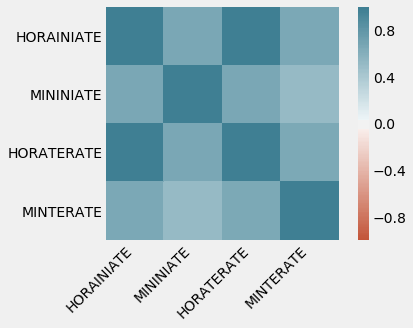

In [20]:
data = time_series

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [54]:
hospital = 'GTSSA002101'
rara = dat_2010[(dat_2010.CLUES == hospital) & (dat_2010.FECHAINGRE == '2010-10-25')][dat_2010.duplicated()]
rara.describe(include='all')
rara[rara.duplicated()]
dat_2010[dat_2010.duplicated()].index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Int64Index([   3575,    3884,    7583,    8554,    8859,   11469,   11745,
              13372,   14156,   14722,
            ...
            7800189, 7800198, 7800199, 7800205, 7800239, 7800303, 7800326,
            7800330, 7800348, 7815626],
           dtype='int64', length=89164)